© Alexander Jüstel, Fraunhofer IEG, Institution for Energy Infrastructures and Geothermal Systems, RWTH Aachen University,
GNU Lesser General Public License v3.0

# 08 Processing Data Type 4 - Vector Polygons with different fuel type

This notebook illustrates how to process data of Data Type 4 - Vector Polygons with different fuel type. The input data is provided as building polygons including the gas usage which has to be converted using a conversion factor.

## Importing Libraries

In [1]:
import rasterio
from rasterio.plot import show
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt

from pyheatdemand import processing 

C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\ale93371\Anaconda3\envs\pygeomechanical\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Loading Sample Data

The sample data is loaded using `GeoPandas`.

In [2]:
data = gpd.read_file('../../../test/data/Data_Type_IV_Vector_Polygons_Gas_Demand.shp')
data.head()

,GD_m2,FID,geometry
0,35.586735,0,"POLYGON ((3665209.766 2852113.017, 3665209.718..."
1,18.363940,0,"MULTIPOLYGON (((3665420.526 2852075.552, 36654..."
2,711.267606,0,"POLYGON ((3665476.903 2851879.474, 3665471.143..."
3,137.264151,0,"POLYGON ((3664947.287 2851957.224, 3664950.885..."
4,20.833333,0,"POLYGON ((3665097.062 2851696.983, 3665103.396..."


Text(61.347222222222214, 0.5, 'Y [m]')

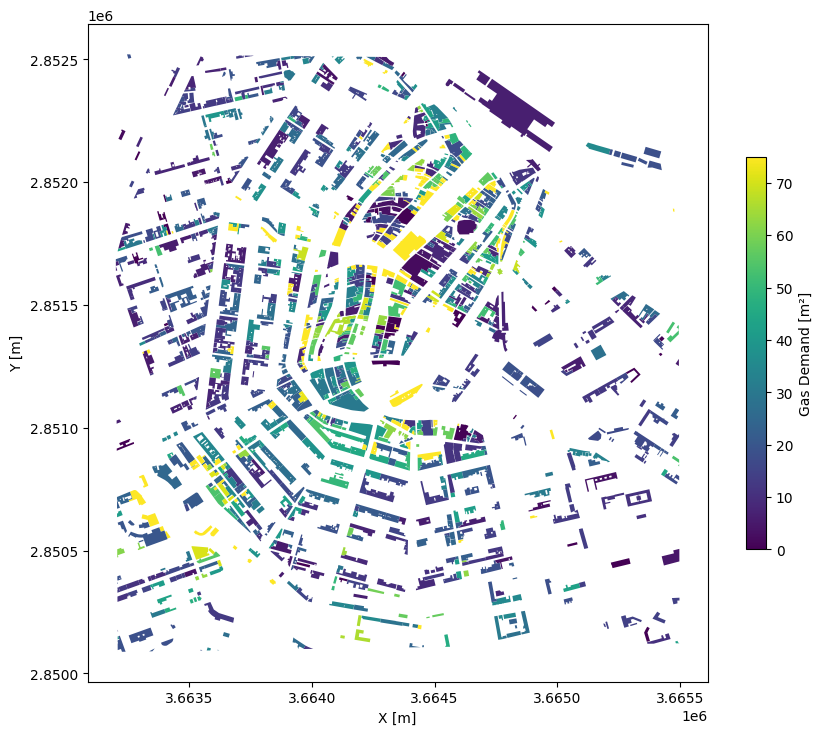

In [3]:
fig, ax = plt.subplots(figsize=(10,10))

data.plot(ax=ax,column='GD_m2', vmax=75, legend=True, legend_kwds={'shrink':0.51, 'label': 'Gas Demand [m²]'})

plt.xlabel('X [m]')
plt.ylabel('Y [m]')

## Converting Gas Demand in Heat Demand

The Gas Demand is converted using a conversion factor to MWh. 

In [4]:
data['HeatDemand'] = data['GD_m2']* (31.65 / 3.6 / 1000 * (0.73 + 0.23))
data

,GD_m2,FID,geometry,HeatDemand
0,35.586735,0,"POLYGON ((3665209.766 2852113.017, 3665209.718...",0.300352
1,18.363940,0,"MULTIPOLYGON (((3665420.526 2852075.552, 36654...",0.154992
2,711.267606,0,"POLYGON ((3665476.903 2851879.474, 3665471.143...",6.003099
3,137.264151,0,"POLYGON ((3664947.287 2851957.224, 3664950.885...",1.158509
4,20.833333,0,"POLYGON ((3665097.062 2851696.983, 3665103.396...",0.175833
...,...,...,...,...
817,42.857143,0,"POLYGON ((3665491.398 2850124.950, 3665493.497...",0.361714
818,10.364683,0,"POLYGON ((3665461.091 2850139.854, 3665441.909...",0.087478
819,34.123948,0,"POLYGON ((3665451.883 2850122.187, 3665451.969...",0.288006
820,14.385793,0,"MULTIPOLYGON (((3665194.937 2850188.179, 36651...",0.121416


## Inspect CRS

We are inspecting the CRS and see that is does not match with the desired CRS `EPSG:3034`.

In [5]:
data.crs

<Projected CRS: EPSG:3034>
Name: ETRS89-extended / LCC Europe
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Türkiye (Turkey); United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Conformal 2001
- method: Lambert Conic Conformal (2SP)
Datum: Euro

## Creating GeoDataFrame Outline from vectorized Raster

For further processing, we are creating an outline `GeoDataFrame` from the `total_bounds` of the vectorized raster.

In [6]:
gdf = processing.create_outline(data)
gdf

,geometry
0,"POLYGON ((3665497.186 2850087.636, 3665497.186..."


## Loading Interreg Mask

We are loading the previously created 10 km mask. 

In [7]:
mask_10km = gpd.read_file('../../../test/data/Interreg_NWE_mask_10km_3034.shp')
mask_10km

,FID,geometry
0,0,"POLYGON ((2651470.877 2955999.353, 2651470.877..."
1,1,"POLYGON ((2651470.877 2965999.353, 2651470.877..."
2,2,"POLYGON ((2651470.877 2975999.353, 2651470.877..."
3,3,"POLYGON ((2651470.877 2985999.353, 2651470.877..."
4,4,"POLYGON ((2651470.877 2995999.353, 2651470.877..."
...,...,...
9225,9225,"POLYGON ((4141470.877 2605999.353, 4141470.877..."
9226,9226,"POLYGON ((4141470.877 2615999.353, 4141470.877..."
9227,9227,"POLYGON ((4151470.877 2585999.353, 4151470.877..."
9228,9228,"POLYGON ((4151470.877 2595999.353, 4151470.877..."


In [8]:
mask_10km.crs

<Projected CRS: EPSG:3034>
Name: ETRS89-extended / LCC Europe
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Türkiye (Turkey); United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Conformal 2001
- method: Lambert Conic Conformal (2SP)
Datum: Euro

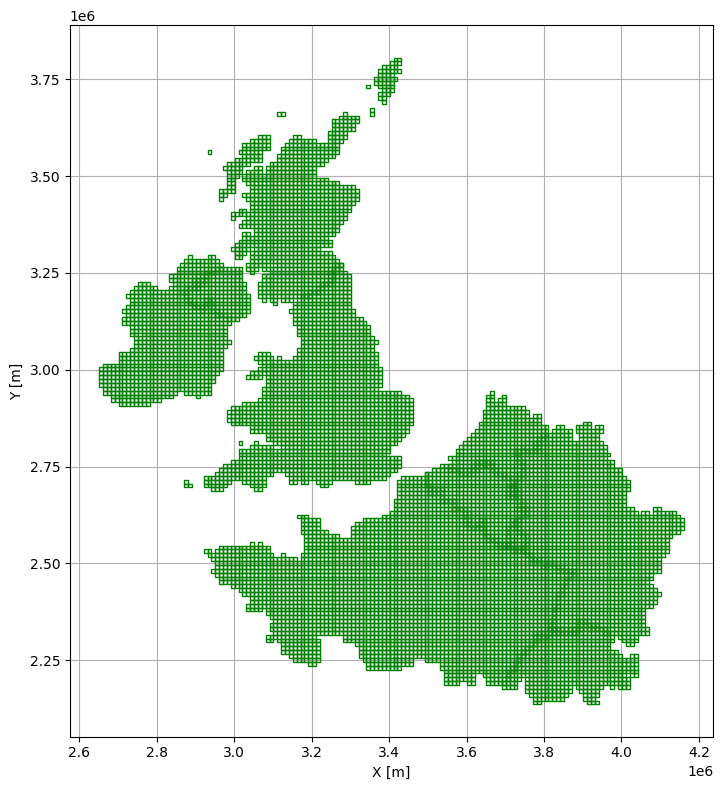

In [9]:
fig, ax = plt.subplots(figsize=(8,8))
mask_10km.boundary.plot(ax=ax, linewidth=1, color='green')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.grid()
plt.tight_layout()

## Crop Mask to Data Limits

The 10 km cells that intersect with the data outline are selected. 

In [10]:
mask_10km_cropped = mask_10km.sjoin(gdf).reset_index()[['geometry']]
mask_10km_cropped

,geometry
0,"POLYGON ((3661470.877 2845999.353, 3661470.877..."


## Plotting the Cropped Mask

The cropped mask and the data outline are plotted using `matplotlib`. 

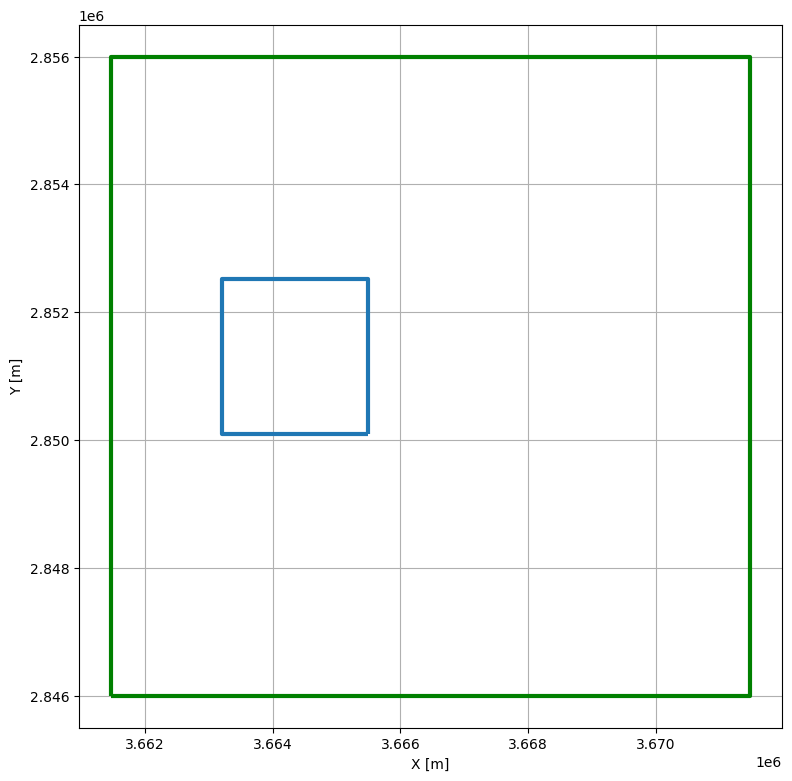

In [11]:
fig, ax = plt.subplots(figsize=(8,8))
mask_10km_cropped.boundary.plot(ax=ax, linewidth=3, color='green')
gdf.to_crs('EPSG:3034').boundary.plot(ax=ax, linewidth=3)
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.grid()
plt.tight_layout()

## Creating mask from cropped mask

Here, the final mask with a width and height of 100 m is created. 

In [12]:
mask_100m_cropped = processing.create_polygon_mask(gdf=mask_10km_cropped, 
                                                   step_size=100,
                                                   crop_gdf=True)
mask_100m_cropped

,geometry
0,"POLYGON ((3661470.877 2845999.353, 3661570.877..."
1,"POLYGON ((3661470.877 2846099.353, 3661570.877..."
2,"POLYGON ((3661470.877 2846199.353, 3661570.877..."
3,"POLYGON ((3661470.877 2846299.353, 3661570.877..."
4,"POLYGON ((3661470.877 2846399.353, 3661570.877..."
...,...
9995,"POLYGON ((3671370.877 2855499.353, 3671470.877..."
9996,"POLYGON ((3671370.877 2855599.353, 3671470.877..."
9997,"POLYGON ((3671370.877 2855699.353, 3671470.877..."
9998,"POLYGON ((3671370.877 2855799.353, 3671470.877..."


## Cropping Mask to outline

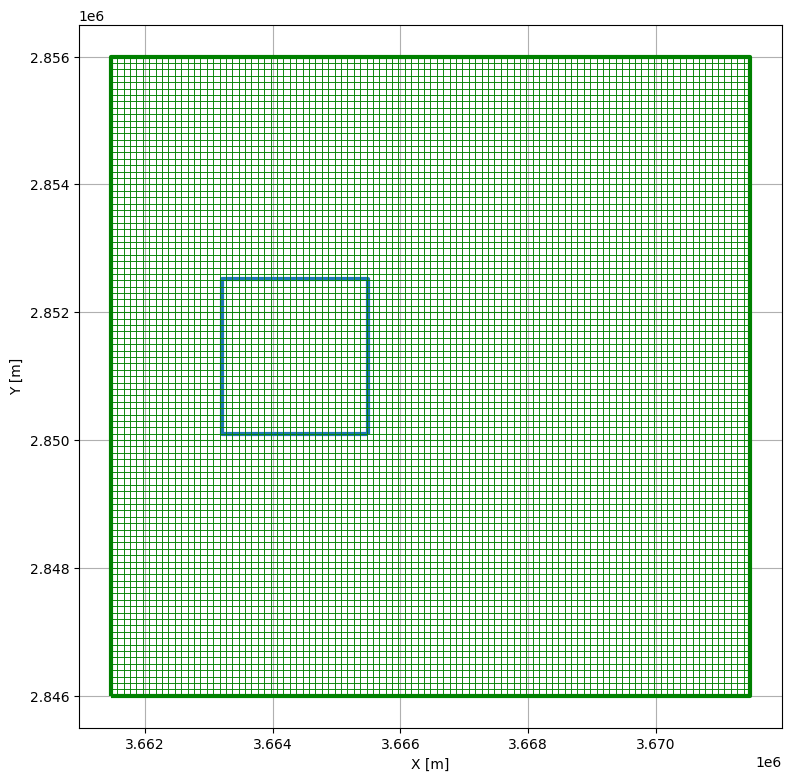

In [13]:
fig, ax = plt.subplots(figsize=(8,8))
mask_10km_cropped.boundary.plot(ax=ax, linewidth=3, color='green')
gdf.to_crs('EPSG:3034').boundary.plot(ax=ax, linewidth=3)
mask_100m_cropped.boundary.plot(ax=ax, linewidth=0.5, color='green')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.grid()
plt.tight_layout()

#plt.savefig('../images/Data_Type_1_Outline.png', dpi=300)

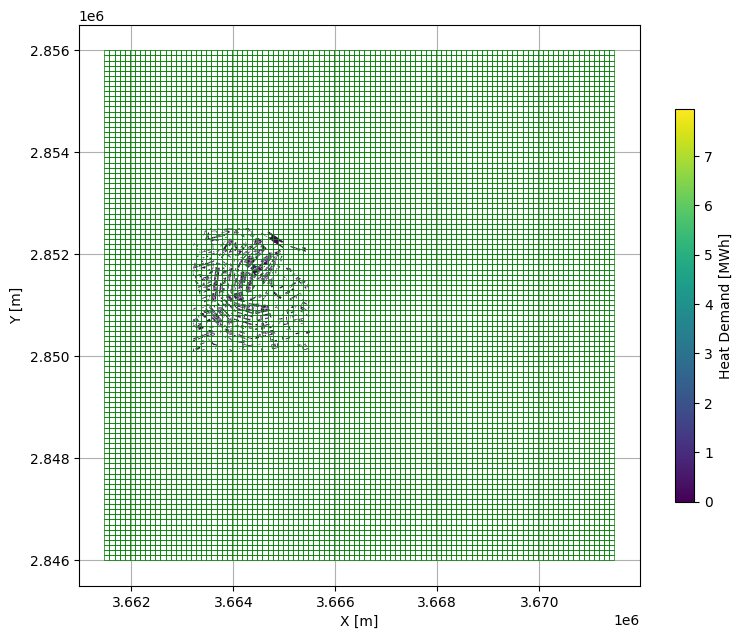

In [14]:
fig, ax = plt.subplots(figsize=(8,8))
# mask_10km_cropped.boundary.plot(ax=ax, linewidth=3, color='green')
# gdf.to_crs('EPSG:3034').boundary.plot(ax=ax, linewidth=3)
mask_100m_cropped.boundary.plot(ax=ax, linewidth=0.5, color='green')
data.plot(ax=ax, column='HeatDemand', legend=True, legend_kwds={'shrink':0.51, 'label': 'Heat Demand [MWh]'})
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.grid()
plt.tight_layout()

## Calculate Heat Demand

With the vectorized raster and the 100 m mask, we can now directly calculate the heat demand using `calculate_hd`. 

In [15]:
hd_gdf = data
mask_gdf = mask_100m_cropped

In [16]:
gdf_hd = processing.calculate_hd(hd_gdf, 
                                 mask_gdf, 
                                 'HeatDemand')
gdf_hd 

,HD,geometry
0,0.137625,"POLYGON ((3663170.877 2849999.353, 3663270.877..."
1,0.584623,"POLYGON ((3663170.877 2850099.353, 3663270.877..."
2,0.010146,"POLYGON ((3663170.877 2850199.353, 3663270.877..."
3,0.721285,"POLYGON ((3663170.877 2850299.353, 3663270.877..."
4,0.336139,"POLYGON ((3663170.877 2850399.353, 3663270.877..."
...,...,...
499,0.162862,"POLYGON ((3665470.877 2850999.353, 3665570.877..."
500,0.043670,"POLYGON ((3665470.877 2851199.353, 3665570.877..."
501,0.187072,"POLYGON ((3665470.877 2851299.353, 3665570.877..."
502,0.102420,"POLYGON ((3665470.877 2851399.353, 3665570.877..."


Text(61.347222222222214, 0.5, 'Y [m]')

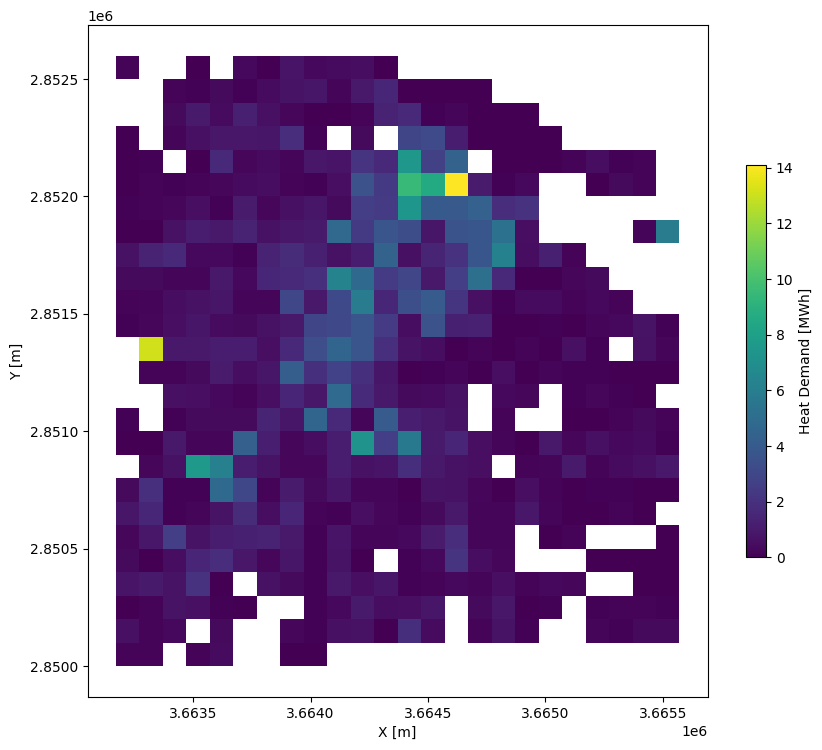

In [17]:
fig, ax = plt.subplots(figsize=(10,10))

gdf_hd.plot(ax=ax,column='HD', legend=True, legend_kwds={'shrink':0.51, 'label': 'Heat Demand [MWh]'})

plt.xlabel('X [m]')
plt.ylabel('Y [m]')

## Rasterizing Vector Data

The vector data will be rasterized and saved to file.

In [18]:
processing.rasterize_gdf_hd(gdf_hd, 
                            path_out='../../../test/data/Data_Type_IV_Vector_Polygons_Gas_Demand.tif',
                            crs = 'EPSG:3034', 
                            xsize = 100,
                            ysize = 100,
                            flip_raster=True)

## Opening and plotting raster
The final raster can now be opened and plotted. 

In [19]:
raster = rasterio.open('../../../test/data/Data_Type_IV_Vector_Polygons_Gas_Demand.tif')

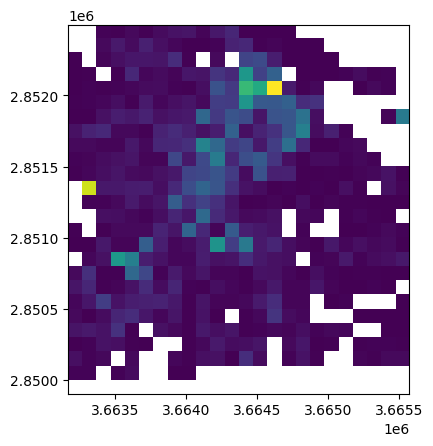

<Axes: >

In [20]:
show(raster)